In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.metrics
import sklearn.datasets
import sklearn.decomposition
import sklearn.neighbors

# 1

a - h)

In [2]:
X = np.random.multivariate_normal([3, 5], [[12, 3], [3, 1]], 1000)

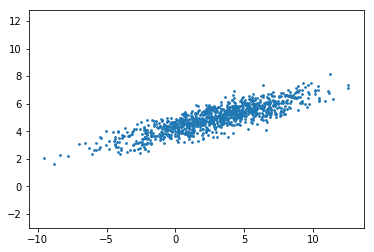

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=3)
plt.axis('equal')
plt.show()

In [4]:
X0 = X - np.mean(X, axis=0)
X0 /= np.std(X0, axis=0)

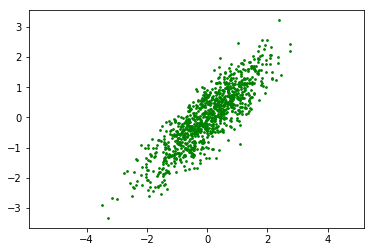

In [5]:
plt.scatter(X0[:, 0], X0[:, 1], s=3, color='g')
plt.axis('equal')
plt.show()

In [6]:
S = np.cov(X0.T)
print(S)

[[1.001001   0.85847889]
 [0.85847889 1.001001  ]]


In [7]:
evals, evecs = np.linalg.eig(S)
lambda1, lambda2 = evals
v1, v2 = evecs[:, 0], evecs[:, 1]
print(f"""
λ1 = {lambda1}
λ2 = {lambda2}

v1 = {v1}
v2 = {v2}
""")


λ1 = 1.8594798935987806
λ2 = 0.14252210840322188

v1 = [0.70710678 0.70710678]
v2 = [-0.70710678  0.70710678]



In [8]:
y1 = X0.dot(v1) / np.sqrt(lambda1)
y2 = X0.dot(v2) / np.sqrt(lambda2)
Y = np.column_stack((y1, y2))

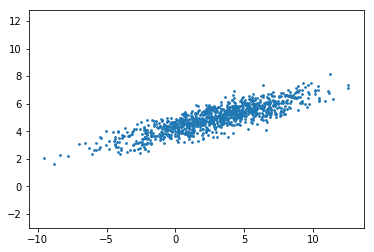

In [9]:
plt.scatter(X[:, 0], X[:, 1], s=3)
plt.axis('equal')
plt.show()

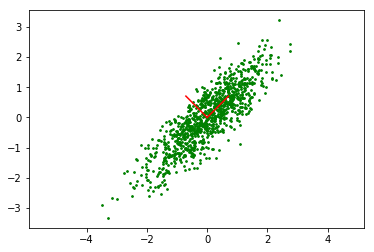

In [10]:
plt.scatter(X0[:, 0], X0[:, 1], s=3, color='g')
plt.plot([0, v1[0]], [0, v1[1]], color='r')
plt.plot([0, v2[0]], [0, v2[1]], color='r')
plt.axis('equal')
plt.show()

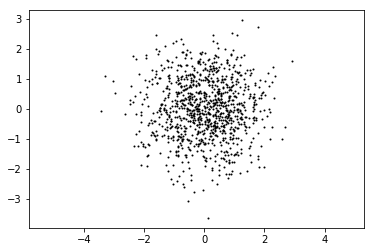

In [11]:
plt.scatter(Y[:, 0], Y[:, 1], s=1, color='k')
plt.axis('equal')
plt.show()

In [12]:
def print_stats(x):
    print(f"""
Mean = {np.mean(x)}
Variance = {np.var(x)}

Covariance matrix
{np.cov(x.T)}

Correlation matrix
{np.corrcoef(x.T)}
    """)

In [13]:
print_stats(X)


Mean = 3.8631853058868124
Variance = 7.904271104550271

Covariance matrix
[[12.53434046  3.03500304]
 [ 3.03500304  0.99914048]]

Correlation matrix
[[1.         0.85762041]
 [0.85762041 1.        ]]
    


In [14]:
print_stats(X0)


Mean = -3.12105896682624e-15
Variance = 1.0

Covariance matrix
[[1.001001   0.85847889]
 [0.85847889 1.001001  ]]

Correlation matrix
[[1.         0.85762041]
 [0.85762041 1.        ]]
    


In [15]:
print_stats(Y)


Mean = -6.549427666868723e-15
Variance = 0.9989999999999992

Covariance matrix
[[1.00000000e+00 5.51221842e-17]
 [5.51221842e-17 1.00000000e+00]]

Correlation matrix
[[1.00000000e+00 5.51221842e-17]
 [5.51221842e-17 1.00000000e+00]]
    


i)

In [16]:
means = [[-21, -2], [3, 5], [27, 12]]
cov_mtx = [[12, 3], [3, 1]]

X2 = np.array([
    np.random.multivariate_normal(means[np.random.choice(3)], cov_mtx)
    for _ in range(1000)
])

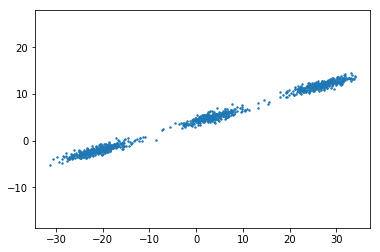

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], s=2)
plt.axis('equal')
plt.show()

In [18]:
X20 = X2 - np.mean(X2, axis=0)
X20 /= np.std(X20, axis=0)

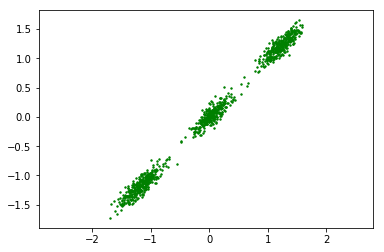

In [19]:
plt.scatter(X20[:, 0], X20[:, 1], s=2, color='g')
plt.axis('equal')
plt.show()

In [20]:
S2 = np.cov(X20.T)
print(S2)

[[1.001001   0.99698896]
 [0.99698896 1.001001  ]]


In [21]:
evals2, evecs2 = np.linalg.eig(S2)
lambda21, lambda22 = evals2
v21, v22 = evecs2[:, 0], evecs2[:, 1]

In [22]:
y21 = X20.dot(v21) / np.sqrt(lambda21)
y22 = X20.dot(v22) / np.sqrt(lambda22)
Y2 = np.column_stack((y21, y22))

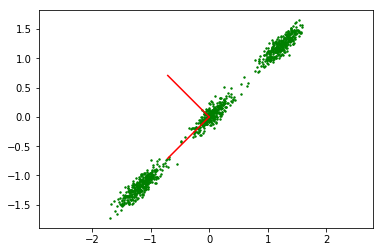

In [23]:
plt.scatter(X20[:, 0], X20[:, 1], s=2, color='g')
plt.plot([0, v21[0]], [0, v21[1]], color='r')
plt.plot([0, v22[0]], [0, v22[1]], color='r')
plt.axis('equal')
plt.show()

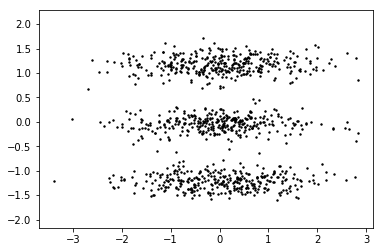

In [24]:
plt.scatter(Y2[:, 0], Y2[:, 1], s=2, color='k')
plt.axis('equal')
plt.show()

In [25]:
print_stats(X2)


Mean = 3.6509322116735294
Variance = 216.06149737800362

Covariance matrix
[[396.03739093 115.09568962]
 [115.09568962  33.71865562]]

Correlation matrix
[[1.         0.99599197]
 [0.99599197 1.        ]]
    


In [26]:
print_stats(X20)


Mean = -2.113864638886298e-16
Variance = 0.9999999999999987

Covariance matrix
[[1.001001   0.99698896]
 [0.99698896 1.001001  ]]

Correlation matrix
[[1.         0.99599197]
 [0.99599197 1.        ]]
    


In [27]:
print_stats(Y2)


Mean = -2.518873998269555e-15
Variance = 0.9990000000000039

Covariance matrix
[[1.00000000e+00 1.00020092e-15]
 [1.00020092e-15 1.00000000e+00]]

Correlation matrix
[[1.00000000e+00 1.00020092e-15]
 [1.00020092e-15 1.00000000e+00]]
    


j)

In [28]:
iris = sklearn.datasets.load_iris()

In [29]:
X3 = iris.data

In [30]:
X30 = X3 - np.mean(X3)
X30 /= np.std(X30)

In [31]:
S3 = np.cov(X30.T)
print(S3)

[[ 0.17596865 -0.01007741  0.32686347  0.13265237]
 [-0.01007741  0.04824723 -0.08256073 -0.03027737]
 [ 0.32686347 -0.08256073  0.79893127  0.33269027]
 [ 0.13265237 -0.03027737  0.33269027  0.14946425]]


In [32]:
evals3, evecs3 = np.linalg.eig(S3)

In [33]:
Y3 = np.column_stack([
    X30.dot(evecs3[:, i]) # / np.sqrt(ev)
    for i, ev in enumerate(evals3)
])

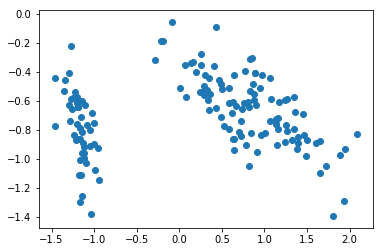

In [34]:
# instructions not clear here
plt.scatter(Y3[:, 0], Y3[:, 1])
plt.show()

k - l)

In [35]:
rec = Y3[:, :2].dot(evecs3.T[:2]) * np.std(X3) + np.mean(X3)

In [36]:
sklearn.metrics.mean_squared_error(rec, X3)

2.2828240570239977

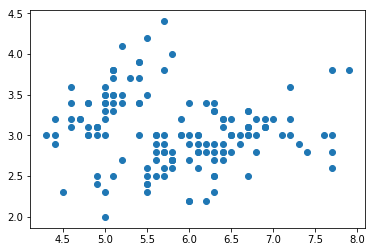

In [37]:
plt.scatter(X3[:, 0], X3[:, 1])
plt.show()

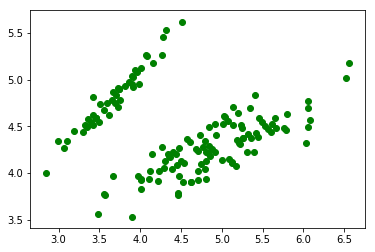

In [38]:
plt.scatter(rec[:, 0], rec[:, 1], color='g')
plt.show()

# 2

In [39]:
train_data = scipy.io.loadmat('assets/ReducedImagesForTraining')
test_data = scipy.io.loadmat('assets/ReducedImagesForTesting')

In [40]:
train_X = train_data['images'].T
train_Y = np.array([i // 5 + 1 for i in range(len(train_X))])

In [41]:
def display_faces(imgs):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for img, ax in zip(imgs[::5], axes):
        ax.axis('off')
        ax.imshow(img.reshape(60, 82).T, cmap='gray')
    fig.tight_layout()

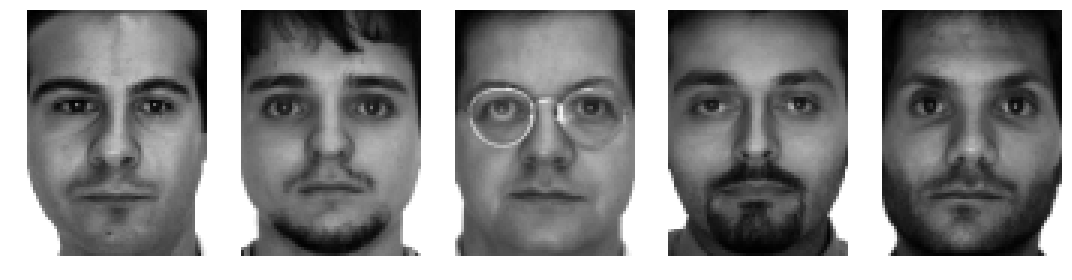

In [42]:
display_faces(train_X)

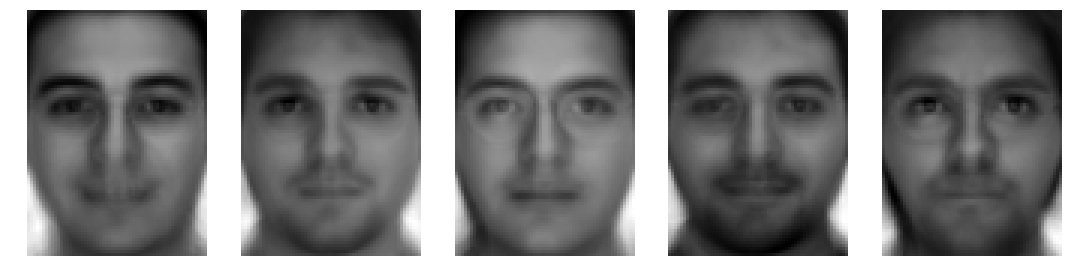

In [43]:
pca = sklearn.decomposition.PCA(n_components=10)
new_X = pca.fit_transform(train_X)
old_X = pca.inverse_transform(new_X)
display_faces(old_X)

# 3

In [44]:
def get_faces_recognizer(train_X, train_Y):
    def _(test_X):
        d1 = np.sum(train_X ** 2, axis=1, keepdims=True)
        d2 = np.sum(test_X ** 2, axis=1, keepdims=True).T
        dists = d1 + d2 - 2 * train_X.dot(test_X.T)
        closest = np.argmin(dists, axis=0)
        return train_Y[closest]
    return _

In [45]:
def test_face_recognition(train_X, train_Y, test_X, test_Y):
    recognize_faces = get_faces_recognizer(train_X, train_Y)
    results = recognize_faces(test_X)
    return np.sum(results == test_Y) / len(test_Y)

In [46]:
test_X = test_data['images'].T
test_Y = np.array([i // 2 + 1 for i in range(len(test_X))])

In [47]:
test_face_recognition(train_X, train_Y, test_X, test_Y)

0.17

# 4

In [48]:
pca = sklearn.decomposition.PCA(n_components=100, whiten=True)

In [49]:
pca.fit(train_X)
train_X_ = pca.transform(train_X)
test_X_ = pca.transform(test_X)

In [50]:
test_face_recognition(train_X_, train_Y, test_X_, test_Y)

0.91

# 5

In [51]:
data = np.vstack((train_X_, test_X_))
target = np.concatenate((train_Y, test_Y))

In [52]:
def cross_validate(knn, data, target):
    data_batches = np.array_split(data, 10)
    target_batches = np.array_split(target, 10)
    
    scores = []
    for i in range(10):
        train_data = np.vstack([*data_batches[:i], *data_batches[i + 1:]])
        train_target = np.hstack([*target_batches[:i], *target_batches[i + 1:]])
        test_data = data_batches[i]
        test_target = target_batches[i]
        
        knn.fit(train_data, train_target)
        score = knn.score(test_data, test_target)
        scores.append(score)
        
    return np.sum(scores) / 10

In [53]:
def prepare_data(pca=False, n=20):
    data = np.vstack((train_X_, test_X_))
    target = np.concatenate((train_Y, test_Y))
    perm = np.random.permutation(len(target))
    data_ = data[perm]
    target_ = target[perm]
    if pca:
        data_ = sklearn.decomposition.PCA(n_components=n, whiten=True).fit_transform(data_)
    return data_, target_

In [54]:
knn = sklearn.neighbors.KNeighborsClassifier(5)
cross_validate(knn, *prepare_data(True, 100))

0.7628571428571428